# Working with pandas Data Frames (Heterogeneous Data)

* Student Name: Michael Rideout
* Student Number: 225065259
* E-mail: s225065259@deakin.edu.au
* Student Course Code: SIT731
---

## Introduction
This report will investigate the capapbilities of Pandas [1] dataframes and it's abilities to manipulate time series data. The dataset analysed was hourly meterological data for three airports in New York: LGA (LaGuardia Airport), JFK (John F Kennedy Airport) and EWR (Newark Liberty International Airport). The dataset contained the following features:

- origin – weather station: LGA, JFK, or EWR,
- year, month, day, hour – time of recording,
- temp, dewp – temperature and dew point in degrees Fahrenheit,
- humid – relative humidity,
- wind_dir, wind_speed, wind_gust – wind direction (in degrees), speed and gust speed (in mph),
- precip – precipitation, in inches,
- pressure – sea level pressure in millibars,
- visib – visibility in miles,
- time_hour – date and hour (based on the year, month, day, hour fields) formatted as YYYY-mm-dd HH:MM:SS (actually, YYYY-mm-dd HH:00:00). However, due to a bug in the dataset, the data in this column are (incorrectly!) shifted by 1 hour. Do not rely on it unless you manually correct it


## Data Manipulation

In [1]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Load the dataset into a pandas dataframe from the gz compressed csv file

In [2]:
df = pd.read_csv("nycflights13_weather.csv.gz", comment="#")
df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01 01:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01 02:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01 03:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01 04:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01 05:00:00


As per the feature set description, the time_hour column is incorrected shifted by 1 hour. We must manually correct this

In [3]:
# Show df column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26130 entries, 0 to 26129
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   origin      26130 non-null  object 
 1   year        26130 non-null  int64  
 2   month       26130 non-null  int64  
 3   day         26130 non-null  int64  
 4   hour        26130 non-null  int64  
 5   temp        26129 non-null  float64
 6   dewp        26129 non-null  float64
 7   humid       26129 non-null  float64
 8   wind_dir    25712 non-null  float64
 9   wind_speed  26127 non-null  float64
 10  wind_gust   26127 non-null  float64
 11  precip      26130 non-null  float64
 12  pressure    23400 non-null  float64
 13  visib       26130 non-null  float64
 14  time_hour   26130 non-null  object 
dtypes: float64(9), int64(4), object(2)
memory usage: 3.0+ MB


In [4]:
# Convert the time hour to datetime datatype
df['time_hour'] = df['time_hour'].astype('datetime64[ns]')

# Correct time_hour by subtracting one hour
df['time_hour'] = df['time_hour'] - pd.Timedelta(hours=1)


## Feature Conversion to Metric

Many of the features are in US imperial measures. Convert features that are to metric.

In [5]:
###
# Question 1 Implementation - Conversion to Metric
###

# Convert temperature from Fahrenheit to Celsius for temp and dewp columns
def fahrenheit_to_celsius(fahrenheit):
    """
    Convert temperature from Fahrenheit to Celsius
    :param fahrenheit: temperature in Fahrenheit
    :return: temperature in Celsius
    """
    return (fahrenheit - 32) * 5 / 9

df['temp'] = df['temp'].apply(fahrenheit_to_celsius)
df['dewp'] = df['dewp'].apply(fahrenheit_to_celsius)


In [6]:
# Convert precip column from inches to millimeters 
df['precip'] = df['precip'] * 25.4

In [7]:
# Convert visib column from miles to meters
df['visib'] = df['visib'] * 1609.34

In [8]:
# Convert wind_speed and wind_gust columns from miles per hour to meters per second
df['wind_speed'] = df['wind_speed'] * 0.44704
df['wind_gust'] = df['wind_gust'] * 0.44704

All required columns are now in metric units.

Now calculate the daily mean wind speeds for LGA airport.

In [9]:
###
# Question 2 Implementation - LGA airport daily wind speed average
###

# Calculate daily average wind_speed for LGA airport
lga_df = df[df['origin'] == 'LGA']
lga_wind_speed_df = lga_df.groupby(['year', 'month', 'day'])['wind_speed'].mean().reset_index(drop=False)
lga_wind_speed_df['date'] = pd.to_datetime(dict(year=lga_wind_speed_df['year'], month=lga_wind_speed_df['month'], day=lga_wind_speed_df['day']))
lga_wind_speed_df.head()

,year,month,day,wind_speed,date
0,2013,1,1,6.687781,2013-01-01
1,2013,1,2,6.430559,2013-01-02
2,2013,1,3,4.908660,2013-01-03
3,2013,1,4,6.880698,2013-01-04
4,2013,1,5,5.144447,2013-01-05


In [10]:
print(f"LGA Airport Daily Wind Speed Average has {lga_wind_speed_df.shape[0]} entries")

LGA Airport Daily Wind Speed Average has 364 entries


Now we have the average daily wind speed for the LGA airport.

Plot this on a line graph

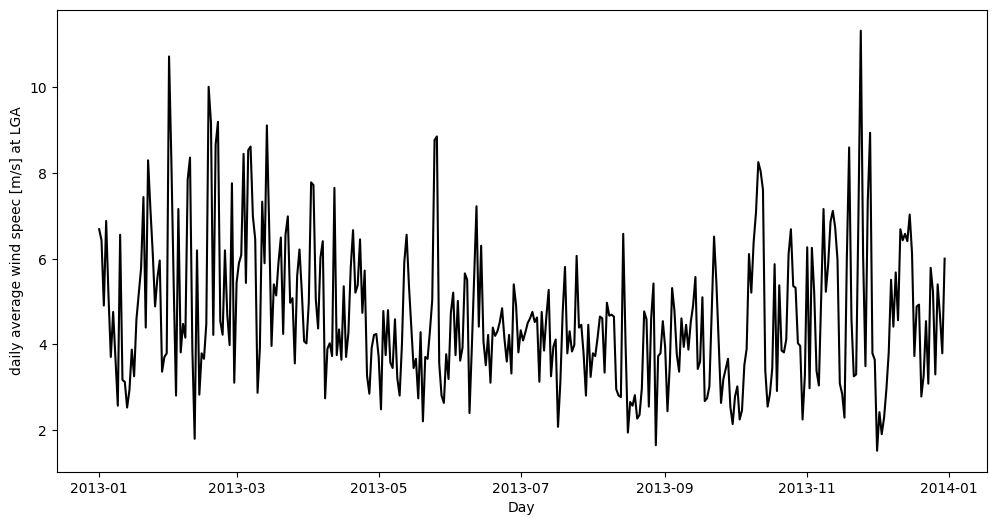

In [11]:
###
# Question 3 Implementation - LGA airport daily wind speed average line graph
###

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(lga_wind_speed_df['date'], lga_wind_speed_df['wind_speed'], color='black')
ax.set_xlabel('Day')
ax.set_ylabel('daily average wind speec [m/s] at LGA')
plt.show()

From the plot of the average daily wind speed at LGA, it can be observed that there is a seasonal spike in wind speed in the winter months. Conversely the summer months have a lower average daily wind speed.

Now identify the ten windiest days at LGA

In [12]:
###
# Question 4 Implementation - Find the ten windiest days at LGA
###

ten_windiest_days_df = lga_wind_speed_df[['date', 'wind_speed']].sort_values(by='wind_speed', ascending=False).head(10)
ten_windiest_days_df = ten_windiest_days_df.reset_index(drop=True).set_index('date')
ten_windiest_days_df['wind_speed'] = ten_windiest_days_df['wind_speed'].round(2)
ten_windiest_days_df


,wind_speed
date,
2013-11-24,11.32
2013-01-31,10.72
2013-02-17,10.01
2013-02-21,9.19
2013-02-18,9.17
2013-03-14,9.11
2013-11-28,8.94
2013-05-26,8.85
2013-05-25,8.77


Compute the monthly wind speed mean for all three airports. But before doing this, remove the largest outlier

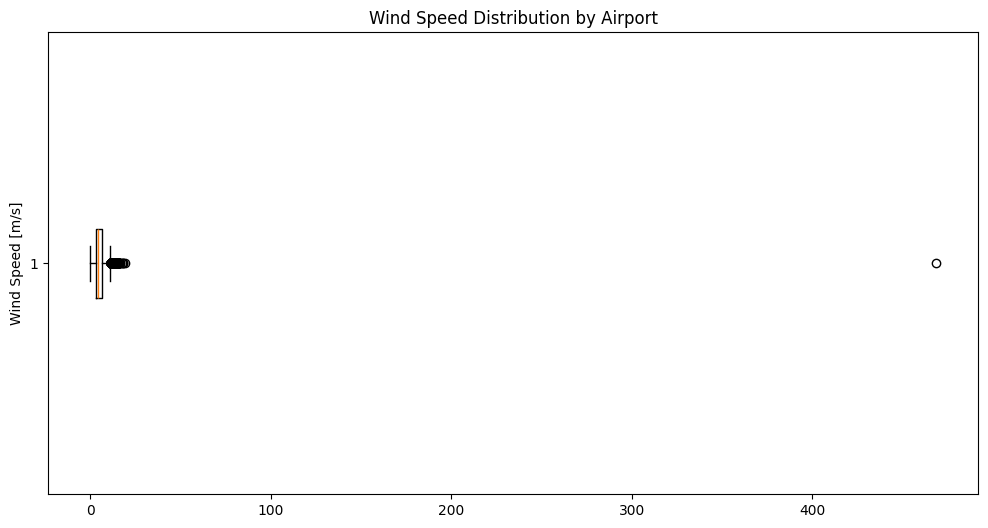

In [13]:
###
# Question 5 Implementation - Compute month mean wind speeds for all three airports
###

# Create a boxplot of all wind speeds for all airports
fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(df['wind_speed'].dropna(), vert=False)
ax.set_ylabel('Wind Speed [m/s]')
ax.set_title('Wind Speed Distribution by Airport')
plt.show()


Whilst there are quite a few outliers, there is one in particular that is extreme. Replace this value with NaN

In [14]:
# Replace the higest wind_speed entry with Nan
df.loc[df['wind_speed'] == df['wind_speed'].max(), 'wind_speed'] = np.nan


In [15]:
# Compute the month mean wind speeds for all three airports
monthly_wind_means_df = df.groupby(['origin', 'month', 'year'])['wind_speed'].mean().round(2).reset_index(drop=False)

# Create the month label
monthly_wind_means_df['month_label'] =  monthly_wind_means_df['year'].astype(str) + '-' + monthly_wind_means_df['month'].astype(str).str.zfill(2) 


A new dataframe for month mean wind speeds has been created for all three airports. Plot this on a line graph

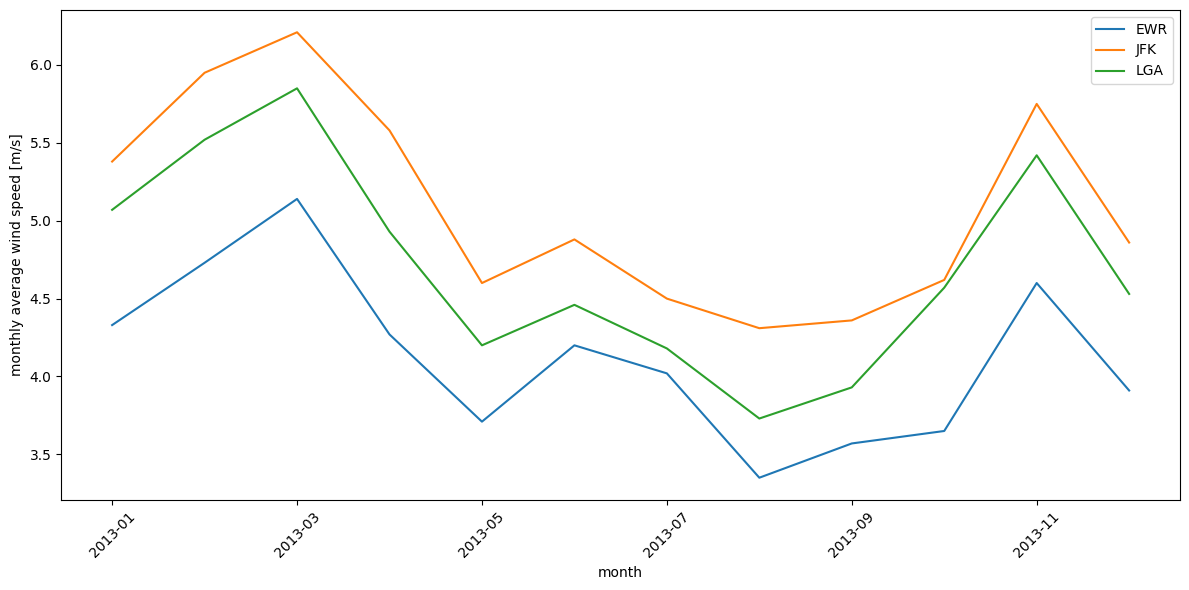

In [16]:
###
# Question 6 Implementation - Graph month mean wind speeds for all three aiports
###

fig, ax = plt.subplots(figsize=(12, 6))

for airport in df['origin'].unique():
    airport_data = monthly_wind_means_df[monthly_wind_means_df['origin'] == airport]
    ax.plot(airport_data['month_label'], airport_data['wind_speed'], label=airport)

# Add labels
ax.set_xlabel('month')
ax.set_ylabel('monthly average wind speed [m/s]')
ax.legend()

# Get all x-tick labels and positions
all_labels = monthly_wind_means_df['month_label'].unique()
# Keep every second label
plt.xticks(range(0, len(all_labels), 2), all_labels[::2], rotation=45)

plt.tight_layout()

plt.show()



Based on this graph we can surmise that JFK is, on average, windier than EWR and LGA across any season. EWR, on the other hand, is the least windy airport out of the three locations

## Conclusion

This report has investigated the Pandas [1] library and its utility in manipulating a dataset of New York airport wind speed for the year 2013. In particular the grouping of data, the construction of new columns and the graphing of dataframes was performed. Extensions to this investigation could entail further data preprocessing to further show case the power of the Pandas library.

## Reference
1. McKinney, W. (2010). Data structures for statistical computing in Python. In S. van der Walt & J. Millman (Eds.), *Proceedings of the 9th Python in Science Conference* (pp. 56–61). https://doi.org/10.25080/Majora-92bf1922-00a